In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta

In [2]:
df = pd.read_csv('Nat_Gas.csv')
df['Dates'] = pd.to_datetime(df['Dates'], format='%m/%d/%y')
df.head()

,Dates,Prices
0,2020-10-31,10.1
1,2020-11-30,10.3
2,2020-12-31,11.0
3,2021-01-31,10.9
4,2021-02-28,10.9


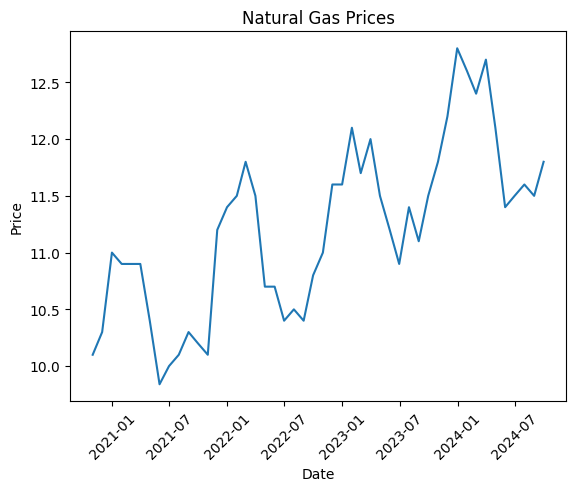

In [3]:
plt.plot(df['Dates'], df['Prices'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Natural Gas Prices')
plt.tick_params(axis='x', rotation=45)

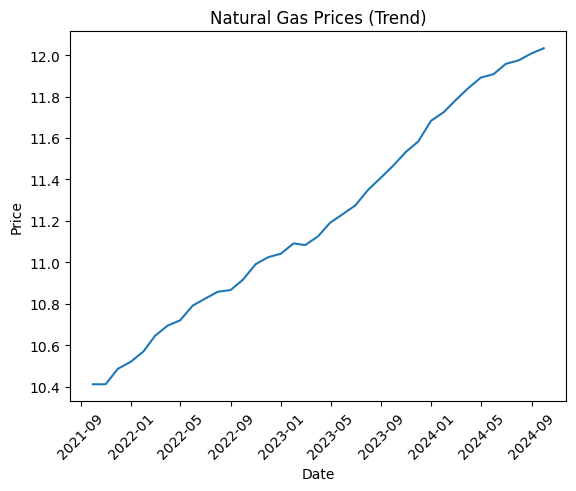

In [4]:
plt.plot(df['Dates'], df['Prices'].rolling(12).mean())
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Natural Gas Prices (Trend)')
plt.tick_params(axis='x', rotation=45)

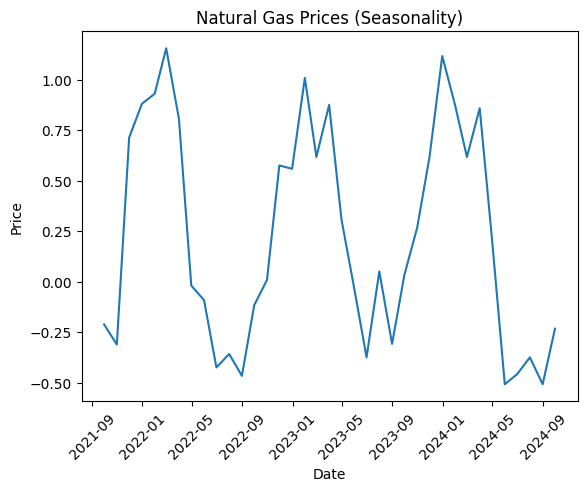

In [5]:
plt.plot(df['Dates'], df['Prices'] - df['Prices'].rolling(12).mean())
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Natural Gas Prices (Seasonality)')
plt.tick_params(axis='x', rotation=45)

In [6]:
# express the x-axis as the number of days from the start_date
start_date = min(df['Dates'])
duration = df['Dates'] - start_date
duration = duration.apply(lambda x: x.days)

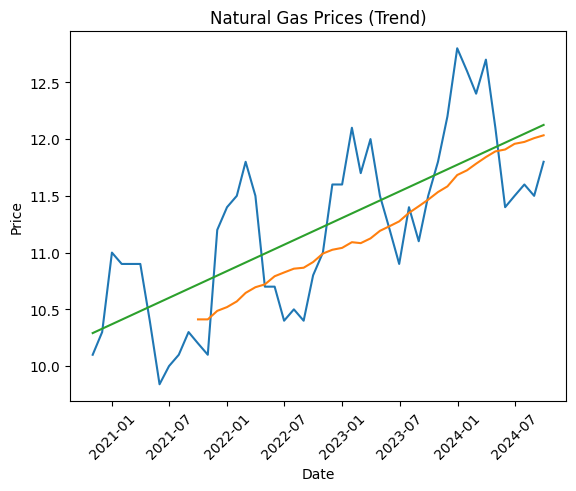

In [7]:
# fit trend using linear regression
mean_price, mean_duration = df['Prices'].mean(), duration.mean()
slope = np.sum((duration - mean_duration) * (df['Prices'] - mean_price)) / np.sum((duration - mean_duration)**2)
intercept = mean_price - (slope * mean_duration)

fitted_trend = [(slope * t) + intercept for t in duration]

plt.plot(df['Dates'], df['Prices'])
plt.plot(df['Dates'], df['Prices'].rolling(12).mean())
plt.plot(df['Dates'], fitted_trend)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Natural Gas Prices (Trend)')
plt.tick_params(axis='x', rotation=45)

In [8]:
# compute seasonality index for seasonality
seasonality = df['Prices'] - df['Prices'].rolling(12).mean()
seasonality_df = pd.DataFrame({'Dates': df['Dates'], 'Seasonality': seasonality})
seasonality_df['Month'] = [x.month for x in seasonality_df['Dates']]
seasonality_df.dropna(inplace=True)

seasonality_idx = seasonality_df.groupby('Month')['Seasonality'].mean()

In [19]:
df[df['Dates'] == end_date]['Prices']

47    11.8
Name: Prices, dtype: float64

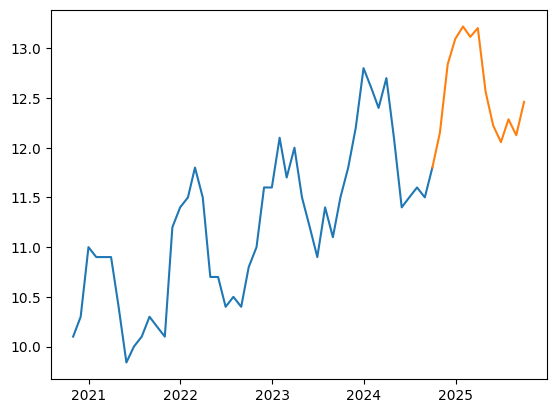

In [32]:
end_date = max(df['Dates'])
forecast_dates = []
for i in range(1, 13):
    forecast_dates.append(end_date + relativedelta(months=i))

forecast_duration = [(d - start_date).days for d in forecast_dates]
forecast_trend = [(slope * t) + intercept for t in forecast_duration]
forecast_seasonality = [seasonality_idx[d.month] for d in forecast_dates]
forecast_price = [forecast_trend[i] + forecast_seasonality[i] for i in range(len(forecast_dates))]

# Insert for plotting purposes 
forecast_dates.insert(0, end_date)
forecast_price.insert(0, df[df['Dates'] == end_date]['Prices'].values[0])

plt.plot(df['Dates'], df['Prices'])
plt.plot(forecast_dates, forecast_price)